In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import contractions
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk import ngrams
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("dataset/mb_data.csv")
data.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
data.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'It has been too long since I have been on per...
freq    1832                                                  1

## Class Distribution

_____________________________________________
Extraversion (E) vs Introversion (I): 
A measure of how much an individual prefers their outer or inner world.
_____________________________________________
Sensing (S) vs Intuition (N): 
A measure of how much an individual processes information through the five senses versus impressions through patterns.
_____________________________________________
Thinking (T) vs Feeling (F): 
A measure of preference for objective principles and facts versus weighing the emotional perspectives of others.
_____________________________________________
Judging (J) vs Perceiving (P): 
A measure of how much an individual prefers a planned and ordered life versus a flexible and spontaneous life
______________________________________________

In [6]:
unique_types = data["type"].unique()
print(unique_types)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [7]:
_classes = data.type.unique()
print(_classes)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [8]:
# Displays a bar plot showing the distribution of values in a specified column of a DataFrame.
def show_class_distribution(
    data,
    x="type",
    figsize=(16, 4),
    title="Distribution of Personality Types",
    xticks_size=10,
    palette="husl",
):

    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=data,hue = x, palette=palette, legend = False) # Generate bar plot using seaborn
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.xticks(size=xticks_size) # Integer that defines the font size for the x-axis tick labels.
    plt.title(title, size=20)
    plt.show()

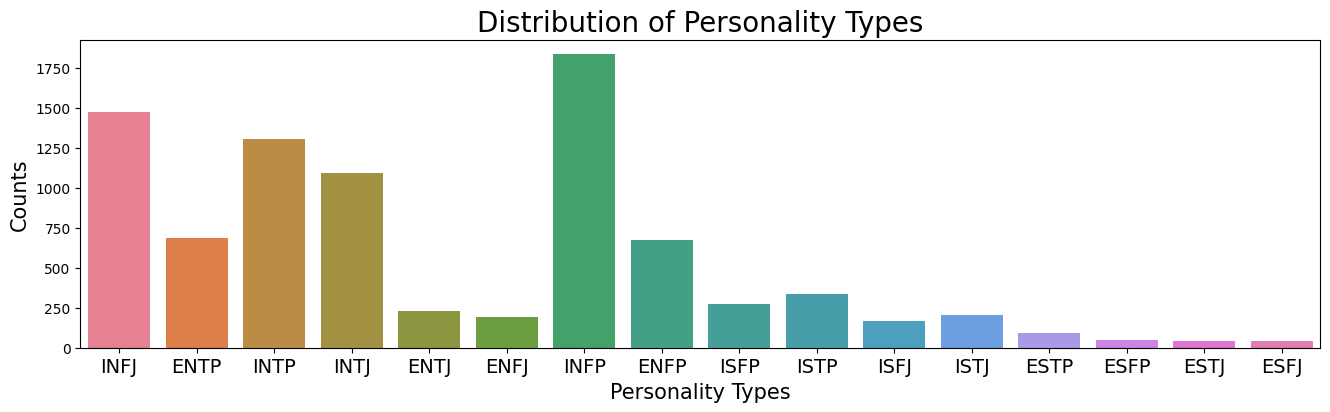

In [9]:
show_class_distribution(data, xticks_size=14);

In [10]:
def divide_types(df):
    # Add new columns for each MBTI dichotomy
    df["E-I"] = "" # Extraversion vs. Introversion
    df["N-S"] = "" # Intuition vs. Sensing
    df["F-T"] = "" # Feeling vs. Thinking
    df["J-P"] = "" # Judging vs. Perceiving
    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        # Assign values based on the corresponding character in the 'type' column
        row["E-I"] = "E" if row.type[0] == "E" else "I"  # First character determines E/I
        row["N-S"] = "N" if row.type[1] == "N" else "S"  # Second character determines N/S
        row["F-T"] = "F" if row.type[2] == "F" else "T"  # Third character determines F/T
        row["J-P"] = "J" if row.type[3] == "J" else "P"  # Fourth character determines J/P
    
    return df  # Return the modified DataFrame

In [11]:
data = divide_types(data)

In [12]:
def divide_types(df):
    df["E-I"] = df["type"].apply(lambda x: x[0])
    df["N-S"] = df["type"].apply(lambda x: x[1])
    df["F-T"] = df["type"].apply(lambda x: x[2])
    df["J-P"] = df["type"].apply(lambda x: x[3])
    return df


data = divide_types(data)
print(data["E-I"].value_counts())
print(data["N-S"].value_counts())
print(data["F-T"].value_counts())
print(data["J-P"].value_counts())

E-I
I    6676
E    1999
Name: count, dtype: int64
N-S
N    7478
S    1197
Name: count, dtype: int64
F-T
F    4694
T    3981
Name: count, dtype: int64
J-P
P    5241
J    3434
Name: count, dtype: int64


In [13]:
def show_class_distribution(
    data, x, title, figsize=(10, 6), xticks_size=15, palette="icefire"
):
    plt.figure(figsize=figsize)
    order = ["E", "I", "N", "S", "F", "T", "J", "P"]  # Force all categories
    sns.countplot(x=x, data=data, order=order, hue=x, palette=palette, legend=False)
    plt.title(title, fontsize=20)
    plt.xticks(fontsize=xticks_size)
    plt.xlabel(x, fontsize=15)
    plt.ylabel("Count", fontsize=15)
    plt.show()



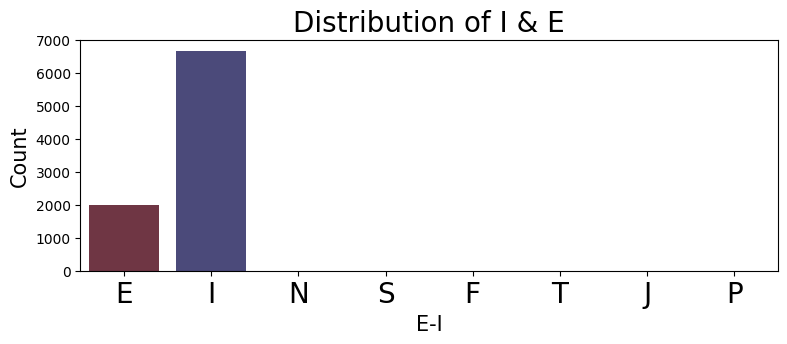

In [14]:
show_class_distribution(
    data,
    x="E-I",
    title="Distribution of I & E",
    figsize=(9, 3),
    xticks_size=20,
    palette="icefire",
)

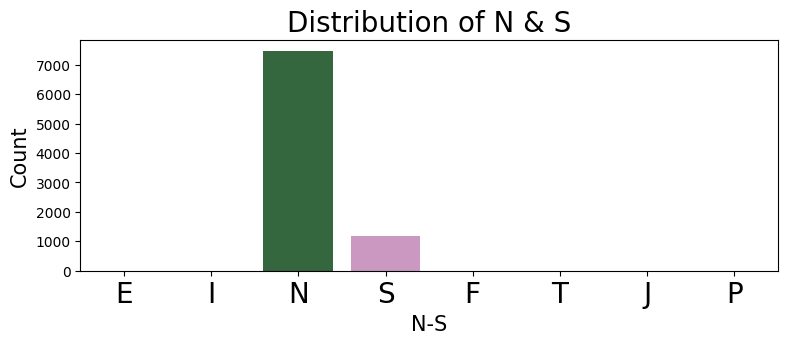

In [15]:
show_class_distribution(
    data,
    x="N-S",
    title="Distribution of N & S",
    figsize=(9, 3),
    xticks_size=20,
    palette="cubehelix",
)

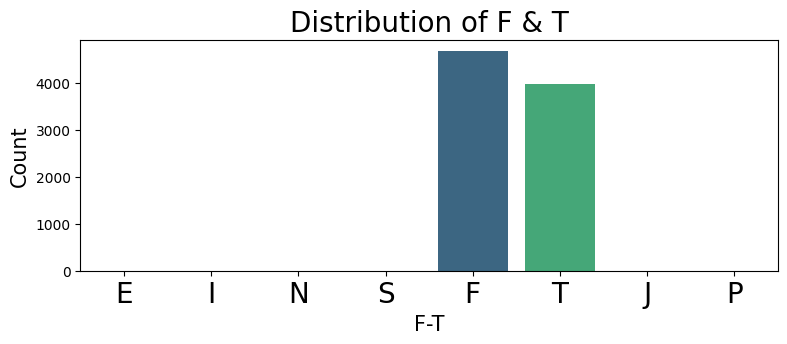

In [16]:
show_class_distribution(
    data,
    x="F-T",
    title="Distribution of F & T",
    figsize=(9, 3),
    xticks_size=20,
    palette="viridis",
)

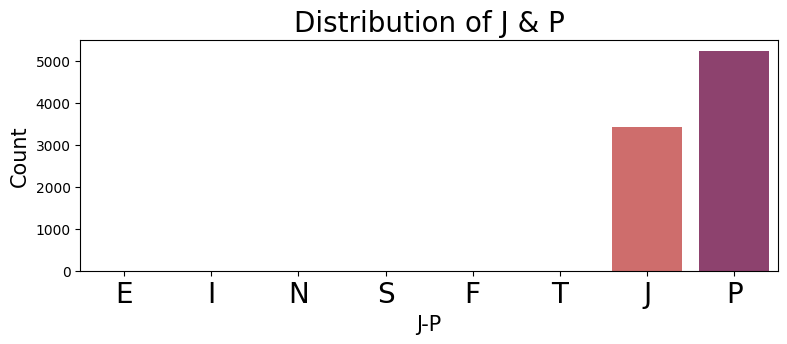

In [17]:
show_class_distribution(
    data,
    x="J-P",
    title="Distribution of J & P",
    figsize=(9, 3),
    xticks_size=20,
    palette="flare",
)

In [18]:
data.loc[10, "posts"]

"'One time my parents were fighting over my dad's affair and my dad pushed my mom. The fall broke her finger.  She's pointed a gun at him and made him get on his knees and beg for his life. She's...|||I'm gonna talk about what a piece of shit my dad is now.  He's an alcoholic and he has some kind of serious mental problem when it comes to complying with the IRS. (In his words, Laws don't apply...|||OMG...at the women's center I lived at, run by a Catholic charity, the fat bully program manager took it upon herself to change policy so that tenants were FORCED to attend the Christmas party. If...|||I don't work, but I have a calling I am 100% committed to 24/7 with no vacation or off days EVER. I'm a Kundalini mystic.  Oh, I don't get paid, either!  It's one of those destined things...|||My art teacher in high school had a stack of art school catalogs. When I saw the one for the school I ended up going to, I immediately knew that was the one. Without any research. It was like when...|||I

In [19]:
data.loc[50, "posts"]

"'Would be interested in a detailed answer to this question also. Would love to answer properly but I agree and i my view is yes, because I procrastinate every day in many areas of my life....|||I believe we are superb at being perfectionists and it causes many problems in life for me.   Sent from my Samsung Galaxy Note 2|||Thanks for that advice. I'm used to writing a few paragraphs, usually around 300 characters.   I agree with your thoughts on this and I will speak to my psychologist and see if that helps.  ...|||I agree, it's mind numbing and the engery I had to put into understanding it was out of the ordinary. I was maybe to quick to judge how good his reply actually was.   In a sense I don't think it...|||Perhaps I should have reread the whole thing a couple of times. I do this a lot, where I get confused about what the reply is trying to say. Maybe my mind was elsewhere trying to concentrate on his...|||Haha I actually read these before I'm on the mailing list for this website.

#### Cleaning

In [20]:
def fix_contractions(df, column_name="posts", new_column="cleaned_post"):
    df[new_column] = df[column_name].apply(
        lambda x: contractions.fix(x)
    )  # converting "don't" to "do not"
    return df

data = fix_contractions(data)

In [21]:
def clean_data(df, column_name="cleaned_post"):
    # Convert all text to lowercase
    df[column_name] = df[column_name].apply(lambda x: x.lower())

    # Remove mentions (e.g., @username)
    df[column_name] = df[column_name].apply(
        lambda x: re.sub(r"@([a-zA-Z0-9_]{1,50})", "", x)
    )

    # Remove hashtags (e.g., #hashtag)
    df[column_name] = df[column_name].apply(
        lambda x: re.sub(r"#([a-zA-Z0-9_]{1,50})", "", x)
    )

    # Remove URLs
    df[column_name] = df[column_name].apply(lambda x: re.sub(r"http[s]?://\S+", "", x))

    # Remove non-alphabetic characters (keeping spaces)
    df[column_name] = df[column_name].apply(lambda x: re.sub(r"[^A-Za-z]+", " ", x))

    # Replace multiple spaces with a single space
    df[column_name] = df[column_name].apply(lambda x: re.sub(r" +", " ", x))

    # Remove words shorter than 3 characters
    df[column_name] = df[column_name].apply(
        lambda x: " ".join([word for word in x.split() if not len(word) < 3])
    )

    return df


# Apply the clean_data function to the DataFrame
data = clean_data(data)

In [22]:
data.loc[7, "cleaned_post"]

'tend build collection things desktop that use frequently and then move them into folder called everything from there get sorted into type and sub type ike collect odd objects even work lot people would call junk but like collect old unused software ill take that off your hands have bunch old adobe think its quite normal tend only see friends real life every couple months said earlier some people just not get but the good ones edit mostly mean tolerate where when sleep dreaming another form being awake how many more layers this are there any thoughts about sleep keep night edit sometimes too scared thanks wish was free follow interests desired feel though wishes are meant for impossible things seeing you mean visual interpreting seeing mentally understanding the concept hello feel though incapable creating anything and wish could cannot stand the interviewer christ that laugh intj hmmm would interesting see intj this show doubt they would that interesting the general public though know

In [23]:
data["words_count"] = data["cleaned_post"].apply(lambda x: len(x.split()))
data.head(5)

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  
0  and intj moments sportscenter not top ten play...          454  
1  finding the lack these posts very alarming sex...          874  
2  good one course which say know that blessing a...          653  
3  dear intp enjoyed our conversation the other d...          820  
4  you are fired that another silly misconception...          782

In [24]:
def plot_counts(df, column, xlabel):
    fig = plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    df[column].plot.hist(bins=25)

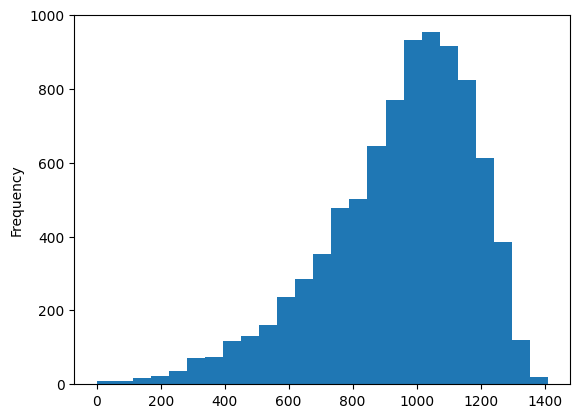

In [25]:
plot_counts(data, column="words_count", xlabel="Words Count")

In [26]:
data["char_count"] = data["cleaned_post"].apply(lambda x: len(x))
data.head(5)

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  
0  and intj moments sportscenter not top ten play...          454        2764  
1  finding the lack these posts very alarming sex...          874        5104  
2  good one course which say know that blessing a...          653        4000  
3  dear intp enjoyed our conversation the other d...          820        4938  
4  you are fired that another silly misconception...          782        4692

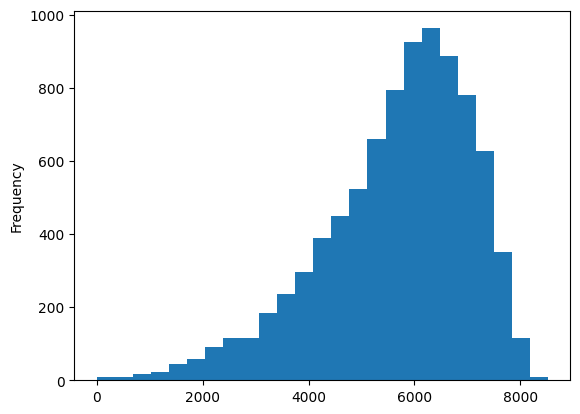

In [27]:
plot_counts(data, column="char_count", xlabel="Character Count")

### Most Frequent Words

In [28]:
stopword_list = stopwords.words("english")

In [29]:
def get_most_frequent(data, stop_words, column="cleaned_post", top=25):
    df = data[column].apply(
        lambda x: " ".join([word for word in x.split() if not word in stop_words])
    )
    combined_words = " ".join(df).split()
    counter = Counter(combined_words)
    return counter.most_common(top)

In [30]:
most_frequents = get_most_frequent(data, stopword_list)
most_frequents[:20]

[('like', 69678),
 ('would', 52964),
 ('think', 49837),
 ('people', 48150),
 ('know', 38174),
 ('one', 37173),
 ('really', 35343),
 ('get', 30806),
 ('time', 27610),
 ('feel', 23337),
 ('much', 23120),
 ('well', 22934),
 ('love', 21123),
 ('good', 20723),
 ('things', 20488),
 ('way', 20469),
 ('want', 20428),
 ('say', 20267),
 ('something', 19608),
 ('see', 19140)]

In [31]:
def show_most_frequents(most_frequent_words, top=20):
    most_frequent_df = pd.DataFrame(most_frequent_words)
    plt.figure(figsize=(16, 4))
    my_cmap = plt.get_cmap("viridis")
    plt.bar(
        x=most_frequent_df.iloc[:top, 0],
        height=most_frequent_df.iloc[:top, 1],
        color="slateblue",
    )
    plt.xlabel("Words", size=17)
    plt.ylabel("Counts", size=17)
    plt.title("Most Frequent Words", size=20)
    plt.show()

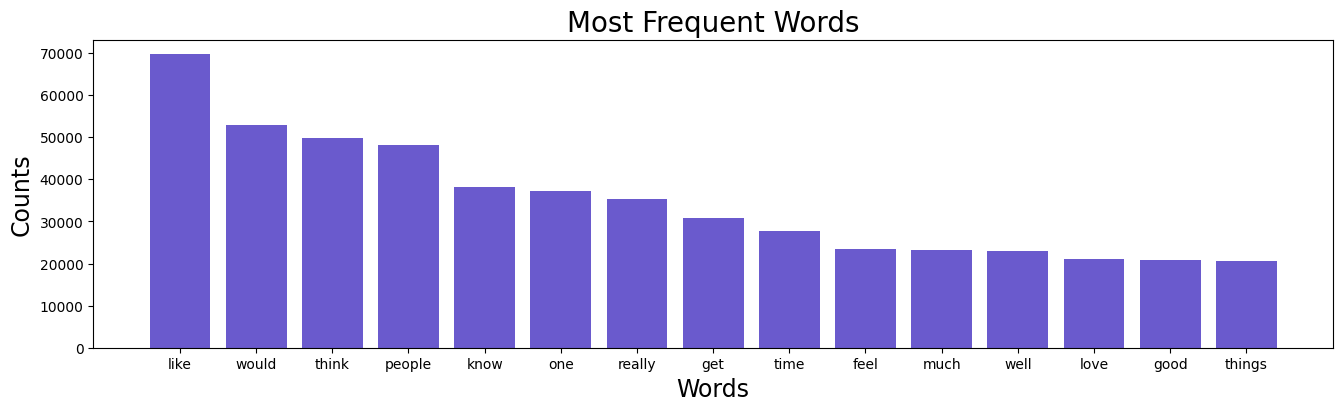

In [32]:
show_most_frequents(most_frequents, top=15)

### WordCLouds

In [33]:
def show_wordcloud(data, stopword_list, column="cleaned_post"):
    fig = plt.figure(figsize=(15, 5))
    wordcloud = WordCloud(
        background_color="black", min_font_size=5, stopwords=stopword_list
    ).generate(data[column].to_string())
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

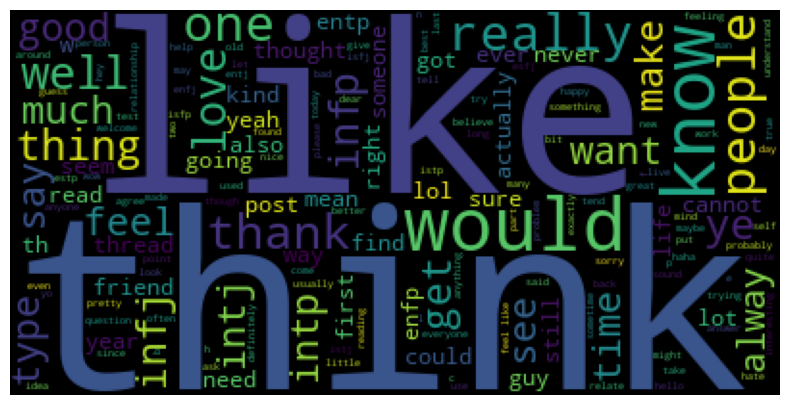

In [34]:
show_wordcloud(data, stopword_list)

In [35]:
def show_sub_wordclouds(data, type_column, column, size, fig_size=(20, 15)):
    classes = data[type_column].unique()
    fig, ax = plt.subplots(len(classes), figsize=fig_size)
    j = 0
    for _class in classes:
        temp = data[data[type_column] == _class]
        wordcloud = WordCloud(background_color="black").generate(
            temp[column].to_string()
        )
        plt.subplot(*size, j + 1)
        plt.title(_class, size=25)
        plt.imshow(wordcloud)
        plt.axis("off")
        j += 1

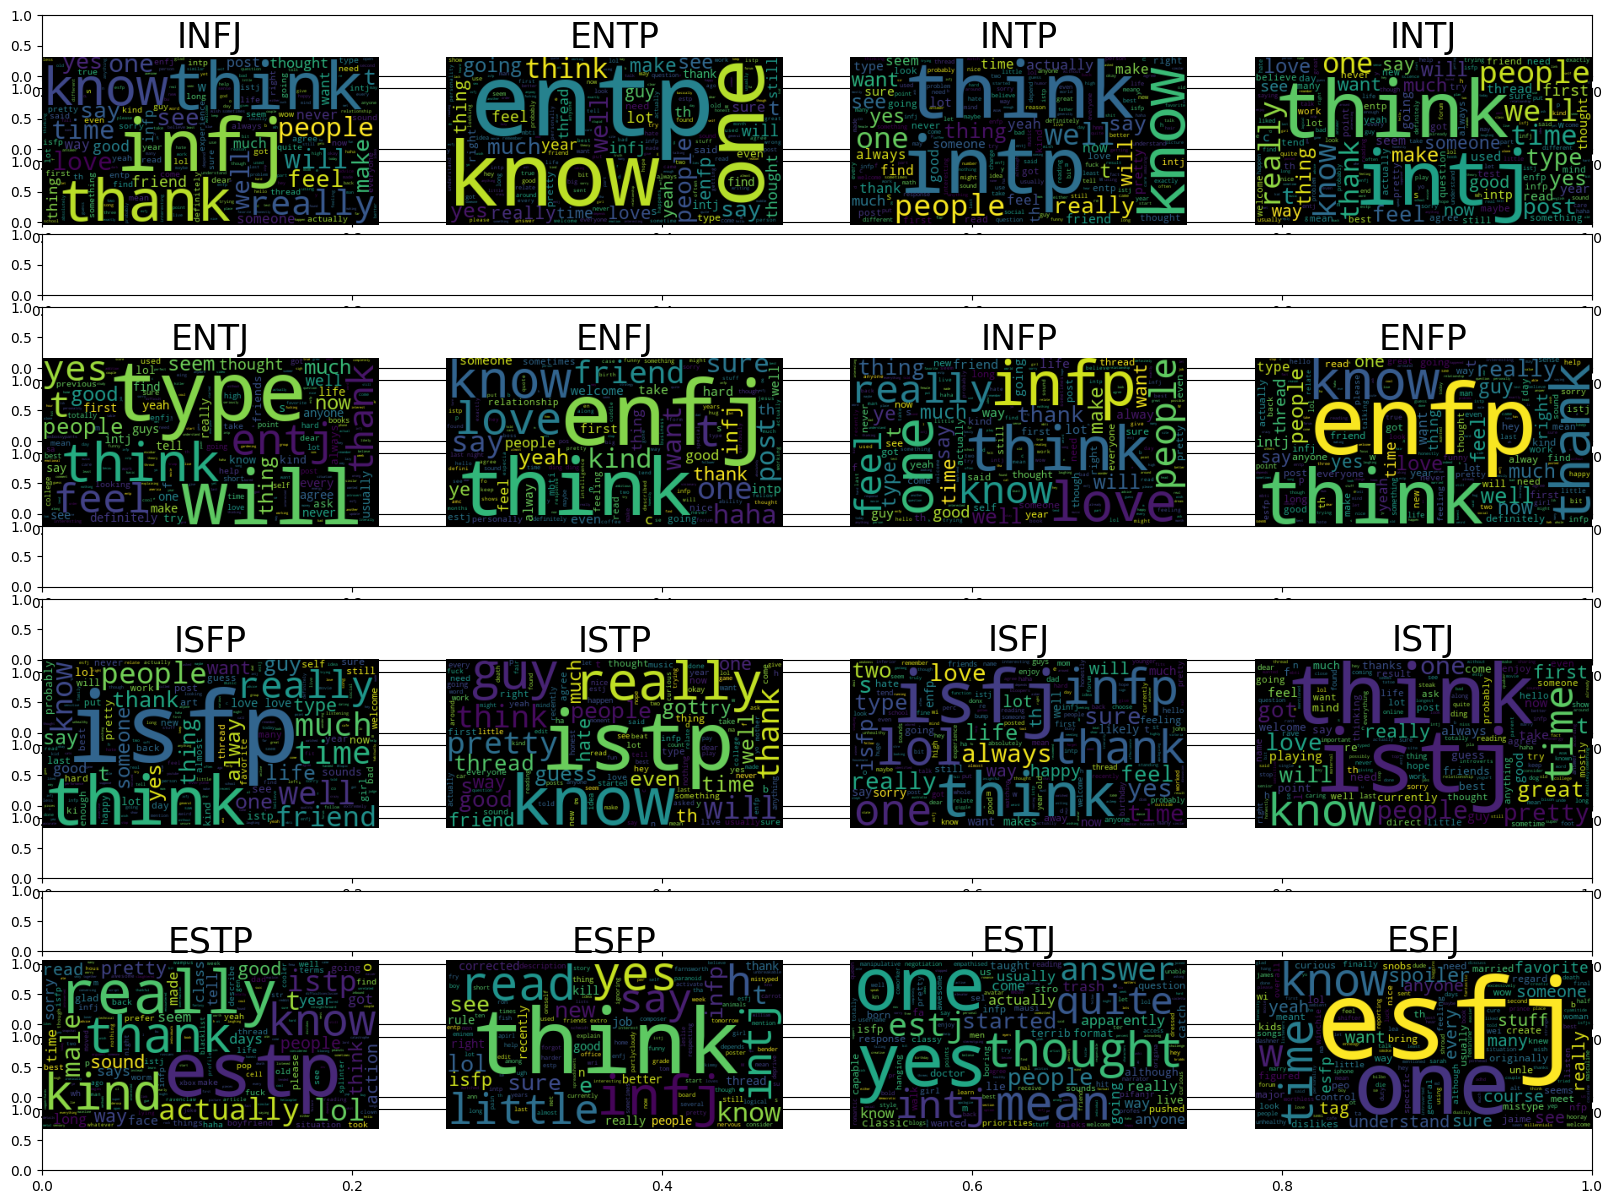

In [36]:
show_sub_wordclouds(data, type_column="type", column="cleaned_post", size=(4, 4))

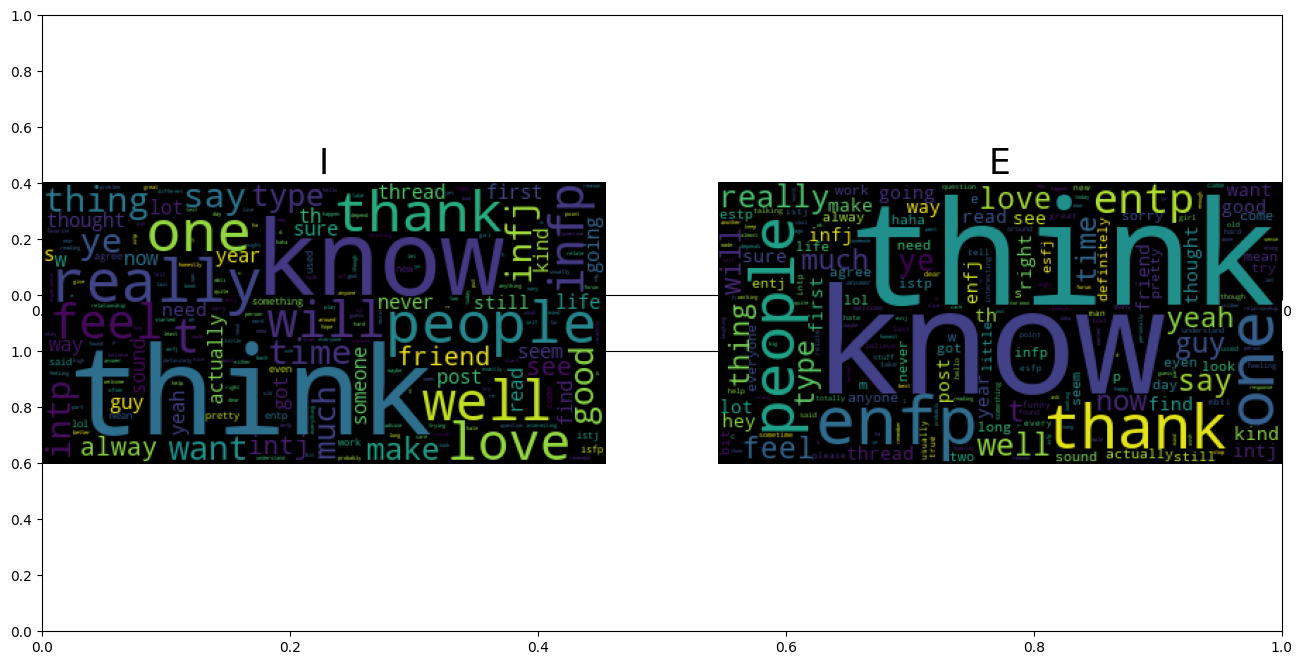

In [37]:
show_sub_wordclouds(
    data, type_column="E-I", column="cleaned_post", size=(1, 2), fig_size=(16, 8)
)

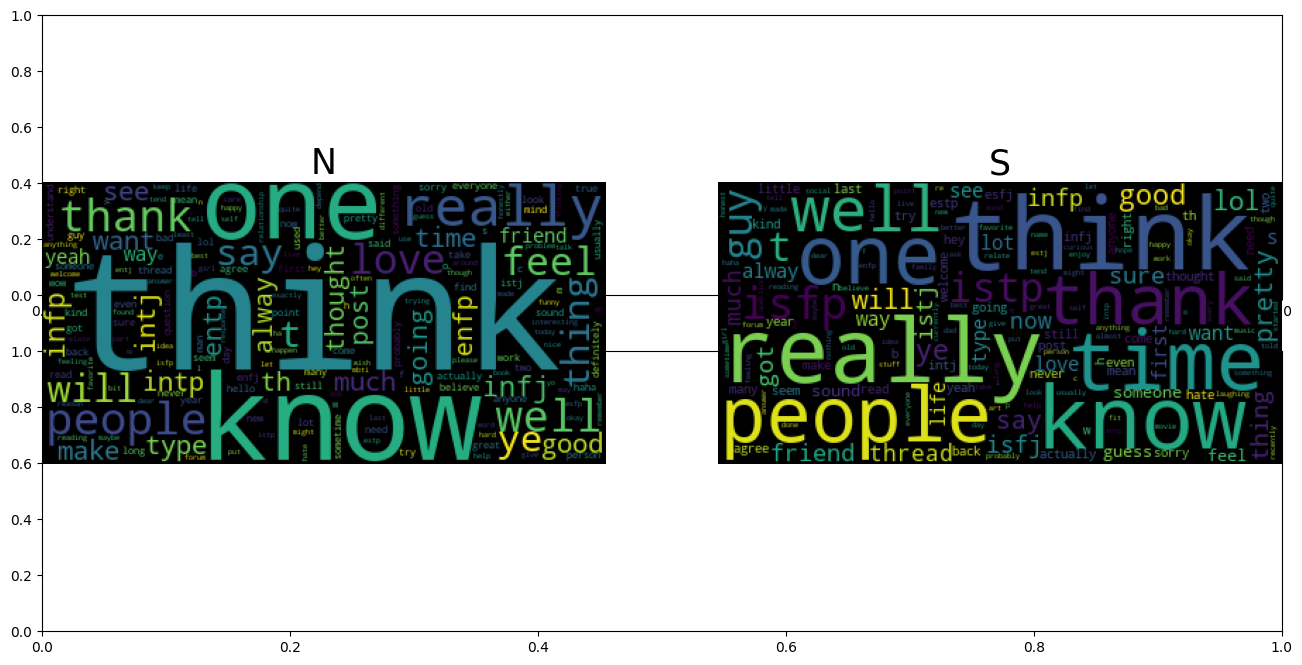

In [38]:
show_sub_wordclouds(
    data, type_column="N-S", column="cleaned_post", size=(1, 2), fig_size=(16, 8)
)

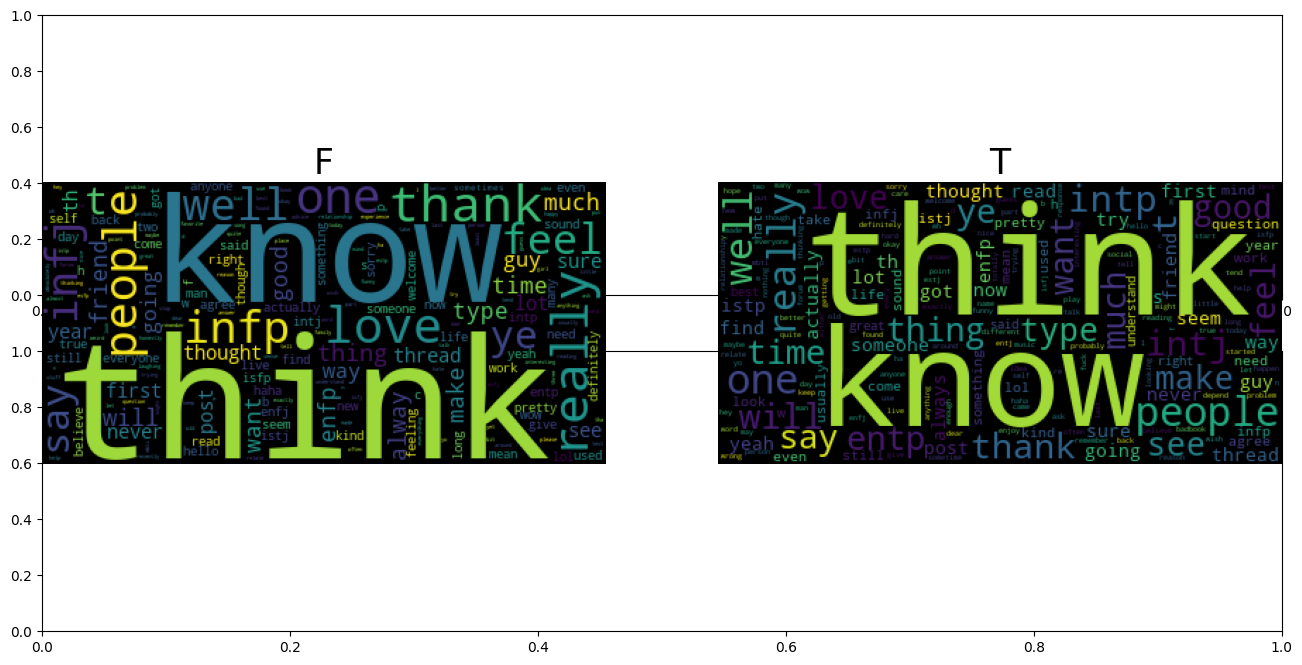

In [39]:
show_sub_wordclouds(
    data, type_column="F-T", column="cleaned_post", size=(1, 2), fig_size=(16, 8)
)

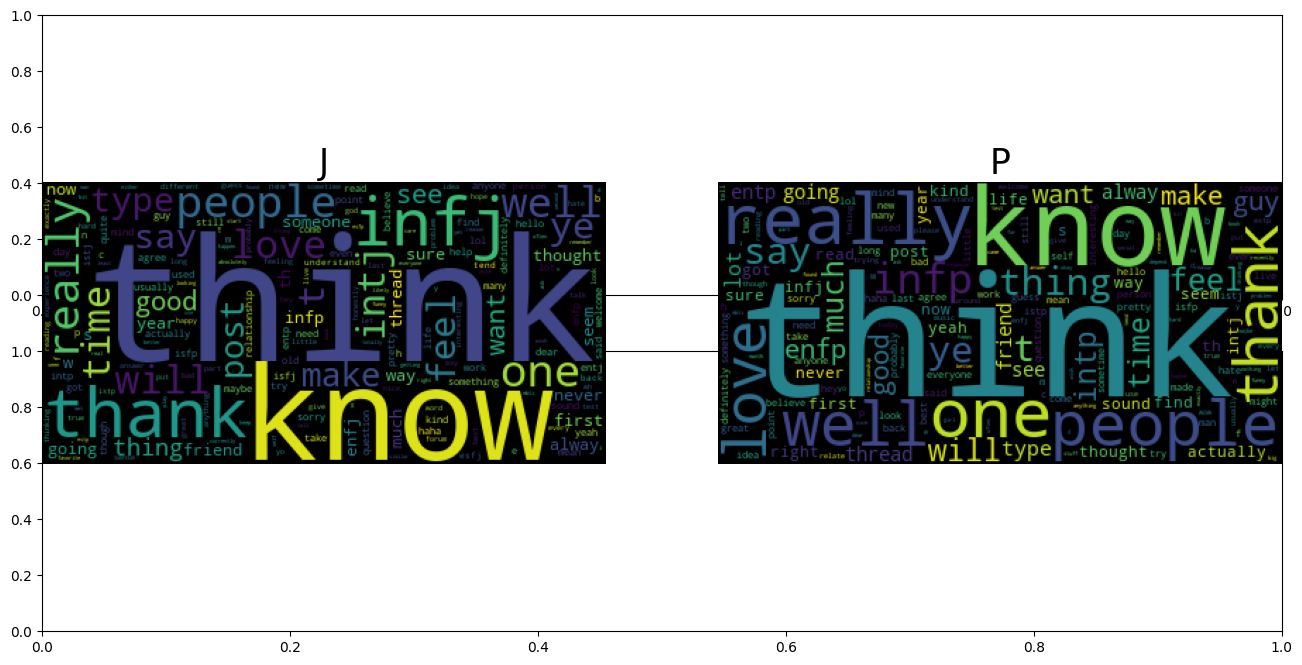

In [40]:
show_sub_wordclouds(
    data, type_column="J-P", column="cleaned_post", size=(1, 2), fig_size=(16, 8)
)

## N Grams

In [41]:
# analyze text structure, identify patterns, and understand relationships between words

In [42]:
def get_ngrams(data, n_gram, new_column, column="cleaned_post"):
    data["tokenized"] = data[column].apply(lambda x: x.split())
    data["sw_removal"] = data["tokenized"].apply(
        lambda x: [y for y in x if not y in stopword_list]
    )
    data[new_column] = data["sw_removal"].apply(lambda x: list(ngrams(x, n_gram)))
    data.drop(columns=["tokenized", "sw_removal"], inplace=True)
    return data

In [43]:
data = get_ngrams(data, n_gram=2, new_column="bigrams")
data.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  and intj moments sportscenter not top ten play...          454        2764   
1  finding the lack these posts very alarming sex...          874        5104   
2  good one course which say know that blessing a...          653        4000   
3  dear intp enjoyed our conversation the other d...          820        4938   
4  you are fired that another silly misconception...          782        4692   

                                             bigrams  
0  [(intj, moments), (moments, sportscenter), (sp...  
1  [(finding, lack), (lack, posts), (posts, alarm...  
2  [(good, one), (one, course), (course, say), (s...  
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...  
4  [(fired, another), (another, silly), (silly, m...

In [44]:
data = get_ngrams(data, n_gram=3, new_column="trigrams")
data.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  and intj moments sportscenter not top ten play...          454        2764   
1  finding the lack these posts very alarming sex...          874        5104   
2  good one course which say know that blessing a...          653        4000   
3  dear intp enjoyed our conversation the other d...          820        4938   
4  you are fired that another silly misconception...          782        4692   

                                             bigrams  \
0  [(intj, moments), (moments, sportscenter), (sp...   
1  [(finding, lack), (lack, posts), (posts, alarm...   
2  [(good, one), (one, course), (course, say), (s...   
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...   
4  [(fired, another), (another, silly), (silly, m...   

                                            trigrams  
0  [(intj, moments, sportscenter), (moments, spor...  
1  [(finding, lack, posts), (lack, posts, alarmin...  
2  [(good, one, course), (one, course, say), (cou...  
3  [(dear, intp, enjoyed), (intp, enjoyed, conver...  
4  [(fired, another, silly), (another, silly, mis...

In [45]:
def most_common_ngram(data, column, top=20):
    temp = []
    for index, row in data.iterrows():
        temp += row[column]
    most_common = Counter(temp).most_common(top)
    return most_common

In [46]:
def plot_n_grams(ngrams, title, top=20):
    ngram_df = pd.DataFrame(ngrams)
    ngram_df.iloc[:, 0] = ngram_df.iloc[:, 0].astype(str)
    plt.figure(figsize=(7, 7))
    plt.barh(y=ngram_df.iloc[:top, 0], width=ngram_df.iloc[:top, 1])
    plt.xlabel("Counts", size=17)
    plt.ylabel("Pairs", size=17)
    plt.title(title, size=20)
    plt.show()

In [47]:
bigrams_most_common = most_common_ngram(data, "bigrams")
bigrams_most_common

[(('feel', 'like'), 5642),
 (('would', 'say'), 4073),
 (('would', 'like'), 3429),
 (('sounds', 'like'), 2606),
 (('pretty', 'much'), 2409),
 (('high', 'school'), 2216),
 (('even', 'though'), 1922),
 (('seems', 'like'), 1902),
 (('best', 'friend'), 1692),
 (('really', 'like'), 1576),
 (('think', 'would'), 1573),
 (('get', 'along'), 1551),
 (('years', 'ago'), 1460),
 (('long', 'time'), 1459),
 (('using', 'tapatalk'), 1376),
 (('personality', 'type'), 1337),
 (('someone', 'else'), 1272),
 (('many', 'people'), 1270),
 (('something', 'like'), 1267),
 (('people', 'think'), 1219)]

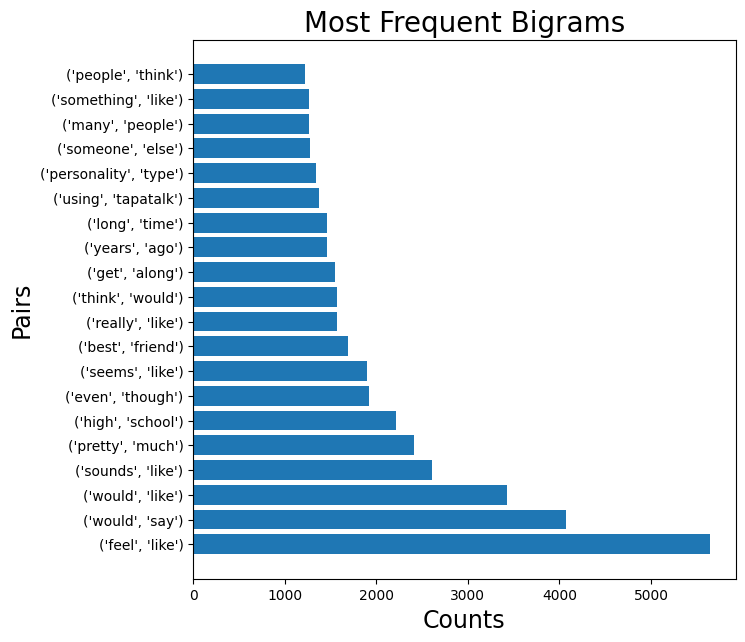

In [48]:
plot_n_grams(bigrams_most_common, title="Most Frequent Bigrams")

In [49]:
trigrams_most_common = most_common_ngram(data, "trigrams")
trigrams_most_common

[(('sent', 'iphone', 'using'), 702),
 (('iphone', 'using', 'tapatalk'), 686),
 (('sent', 'using', 'tapatalk'), 331),
 (('one', 'best', 'friends'), 280),
 (('get', 'along', 'well'), 253),
 (('sometimes', 'feel', 'like'), 207),
 (('would', 'like', 'know'), 192),
 (('long', 'time', 'ago'), 183),
 (('low', 'self', 'esteem'), 173),
 (('anything', 'may', 'affect'), 173),
 (('may', 'affect', 'way'), 171),
 (('affect', 'way', 'answer'), 168),
 (('yes', 'yes', 'yes'), 168),
 (('spend', 'lot', 'time'), 165),
 (('wikipedia', 'free', 'encyclopedia'), 162),
 (('way', 'answer', 'questions'), 158),
 (('answer', 'questions', 'example'), 150),
 (('questions', 'example', 'stressful'), 145),
 (('example', 'stressful', 'time'), 144),
 (('stressful', 'time', 'mental'), 140)]

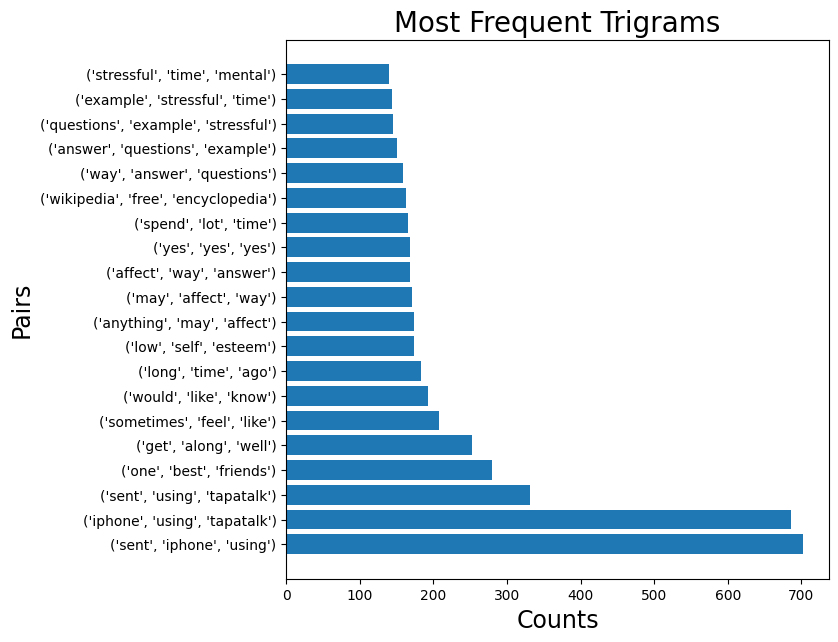

In [50]:
plot_n_grams(trigrams_most_common, title="Most Frequent Trigrams")

### PreProcessing

In [51]:
# 1. Original Data:
# 0    Running and jumping in the parks
# 1    The children are playing games
# 2    She writes stories and reading books

# 2. After stopword removal (tokenized):
# 0    ['running', 'jumping', 'parks']
# 1    ['children', 'are', 'playing', 'games']
# 2    ['she', 'writes', 'stories', 'reading', 'books']

# 3. Final result (lemmatized and joined):
# 0    running jumping park
# 1    child be playing game
# 2    she write story reading book

In [52]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [53]:
# First, create a simple tokenizer that splits on whitespace and removes punctuation
def custom_tokenize(text):
    tokenizer = RegexpTokenizer(r"\w+")
    return tokenizer.tokenize(text.lower())

In [54]:
def remove_stopwords(data, stopword_list, column="cleaned_post"):
    # Use the custom tokenizer instead of word_tokenize
    data[column] = data[column].apply(custom_tokenize)
    data[column] = data[column].apply(
        lambda x: [word for word in x if word not in stopword_list]
    )
    return data

In [55]:
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [56]:
def lemmatize(data, stopword_list, column="cleaned_post"):
    data[column] = data[column].apply(apply_lemmatization)
    data[column] = data[column].apply(" ".join)
    return data

In [57]:
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sakth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [58]:
data = remove_stopwords(data, stopword_list)

In [59]:
data = lemmatize(data, stopword_list)

In [60]:
data.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  intj moment sportscenter top ten play prank li...          454        2764   
1  finding lack post alarming sex boring position...          874        5104   
2  good one course say know blessing curse absolu...          653        4000   
3  dear intp enjoyed conversation day esoteric ga...          820        4938   
4  fired another silly misconception approaching ...          782        4692   

                                             bigrams  \
0  [(intj, moments), (moments, sportscenter), (sp...   
1  [(finding, lack), (lack, posts), (posts, alarm...   
2  [(good, one), (one, course), (course, say), (s...   
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...   
4  [(fired, another), (another, silly), (silly, m...   

                                            trigrams  
0  [(intj, moments, sportscenter), (moments, spor...  
1  [(finding, lack, posts), (lack, posts, alarmin...  
2  [(good, one, course), (one, course, say), (cou...  
3  [(dear, intp, enjoyed), (intp, enjoyed, conver...  
4  [(fired, another, silly), (another, silly, mis...

In [61]:
training_data = data[["cleaned_post", "E-I", "N-S", "F-T", "J-P"]].copy()
training_data.head(5)

cleaned_post E-I N-S F-T J-P
0  intj moment sportscenter top ten play prank li...   I   N   F   J
1  finding lack post alarming sex boring position...   E   N   T   P
2  good one course say know blessing curse absolu...   I   N   T   P
3  dear intp enjoyed conversation day esoteric ga...   I   N   T   J
4  fired another silly misconception approaching ...   E   N   T   J

In [62]:
def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(data[column], prefix="type")
        data = data.join(temp_dummy)
    return data

In [63]:
def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(
            data[column], prefix=f"type_{column}"
        ) 
        data = data.join(
            temp_dummy, lsuffix="_left", rsuffix="_right"
        )
    return data

In [64]:
training_data = make_dummies(training_data)
training_data.head()

cleaned_post E-I N-S F-T J-P  \
0  intj moment sportscenter top ten play prank li...   I   N   F   J   
1  finding lack post alarming sex boring position...   E   N   T   P   
2  good one course say know blessing curse absolu...   I   N   T   P   
3  dear intp enjoyed conversation day esoteric ga...   I   N   T   J   
4  fired another silly misconception approaching ...   E   N   T   J   

   type_E-I_E  type_E-I_I  type_N-S_N  type_N-S_S  type_F-T_F  type_F-T_T  \
0       False        True        True       False        True       False   
1        True       False        True       False       False        True   
2       False        True        True       False       False        True   
3       False        True        True       False       False        True   
4        True       False        True       False       False        True   

   type_J-P_J  type_J-P_P  
0        True       False  
1       False        True  
2       False        True  
3        True       False  
4        True       False

Handling Imbalanced Data

In [65]:
X = training_data[["cleaned_post"]]
y = training_data.drop(columns=["cleaned_post"])

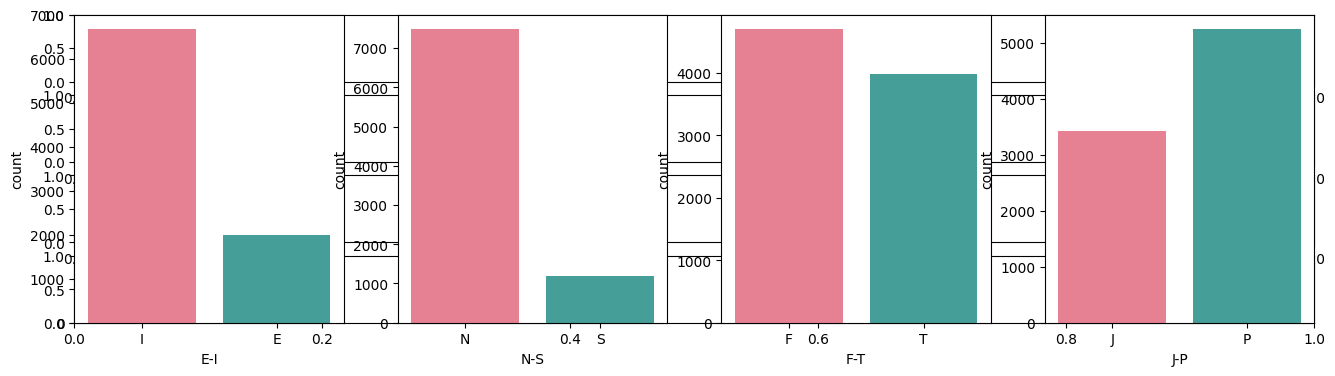

In [66]:
def show_distribution(
    data,
    x=["E-I", "N-S", "F-T", "J-P"],
    fig_size=(16, 4),
    xticks_size=10,
    palette="husl",
):
    fig, ax = plt.subplots(len(x), figsize=fig_size)
    j = 0
    for _x in x:
        plt.subplot(1, 4, j + 1)
        sns.countplot(x=_x, data=data, hue=_x, palette=palette, legend=False)
        plt.xticks(size=xticks_size)
        j += 1

show_distribution(data)

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
y_cat = pd.Categorical(y)

In [69]:
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X, y_cat)

In [70]:
print(y.columns)

Index(['E-I', 'N-S', 'F-T', 'J-P', 'type_E-I_E', 'type_E-I_I', 'type_N-S_N',
       'type_N-S_S', 'type_F-T_F', 'type_F-T_T', 'type_J-P_J', 'type_J-P_P'],
      dtype='object')


In [71]:
y_ei = y.get("type_E", None)
y_ns = y.get("type_N", None)
y_ft = y.get("type_F", None)
y_jp = y.get("type_J", None)

In [72]:
for col in y.columns:
    if "E" in col or "I" in col:
        y_ei = y[col]
    elif "N" in col or "S" in col:
        y_ns = y[col]
    elif "F" in col or "T" in col:
        y_ft = y[col]
    elif "J" in col or "P" in col:
        y_jp = y[col]

In [73]:
X_over_ei, y_over_ei = oversample.fit_resample(X, y_ei)
X_over_ns, y_over_ns = oversample.fit_resample(X, y_ns)
X_over_ft, y_over_ft = oversample.fit_resample(X, y_ft)
X_over_jp, y_over_jp = oversample.fit_resample(X, y_jp)

In [74]:
y_over_ei = y_over_ei.map({True: "E", False: "I"})
y_over_ns = y_over_ns.map({True: "N", False: "S"})
y_over_ft = y_over_ft.map({True: "F", False: "T"})
y_over_jp = y_over_jp.map({True: "J", False: "P"})

In [75]:
# show_class_distribution(data=X_over_ei, x=y_over_ei, figsize=(7, 3), title="E-I")

In [76]:
# show_class_distribution(data=X_over_ns, x=y_over_ns, figsize=(7, 3), title="N-S")

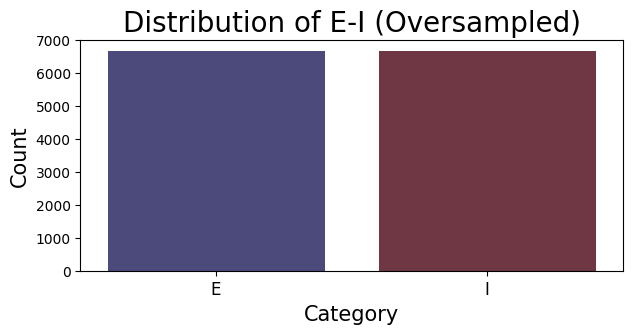

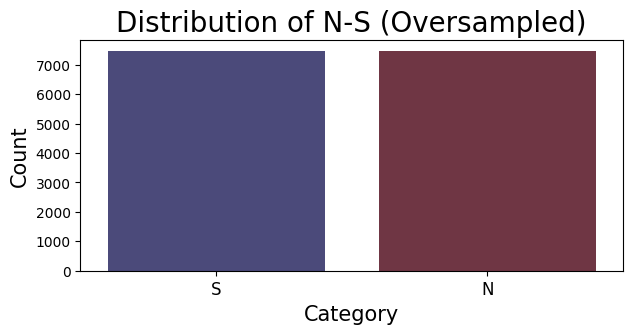

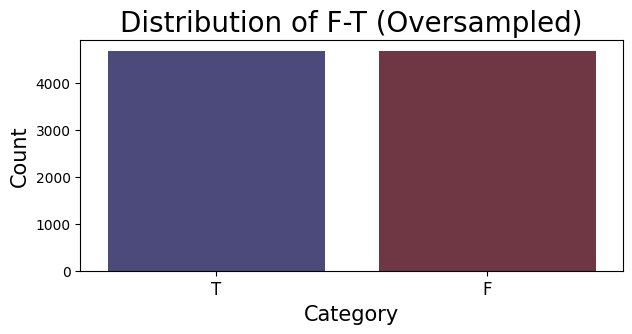

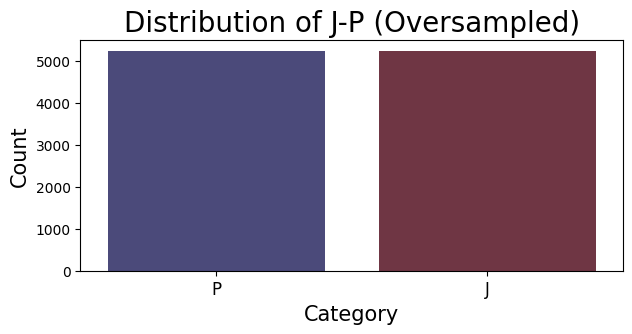

In [77]:
def show_class_distribution(y, title, figsize=(7, 3)):
    plt.figure(figsize=figsize)
    sns.countplot(x=y, hue=y, palette="icefire", legend=False)
    plt.title(title, fontsize=20)
    plt.xlabel("Category", fontsize=15)
    plt.ylabel("Count", fontsize=15)
    plt.xticks(fontsize=12)
    plt.show()


# Now call the function for each dimension
show_class_distribution(y_over_ei, "Distribution of E-I (Oversampled)")
show_class_distribution(y_over_ns, "Distribution of N-S (Oversampled)")
show_class_distribution(y_over_ft, "Distribution of F-T (Oversampled)")
show_class_distribution(y_over_jp, "Distribution of J-P (Oversampled)")

### Train test split for each classes

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train_ei, X_test_ei, y_train_ei, y_test_ei = train_test_split(
    X_over_ei, y_over_ei, test_size=0.3, random_state=42
)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X_over_ns, y_over_ns, test_size=0.3, random_state=42
)
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(
    X_over_ft, y_over_ft, test_size=0.3, random_state=42
)
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(
    X_over_jp, y_over_jp, test_size=0.3, random_state=42
)

In [80]:
X_train_ei = X_train_ei["cleaned_post"]
X_train_ns = X_train_ns["cleaned_post"]
X_train_ft = X_train_ft["cleaned_post"]
X_train_jp = X_train_jp["cleaned_post"]

In [81]:
X_test_ei = X_test_ei["cleaned_post"]
X_test_ns = X_test_ns["cleaned_post"]
X_test_ft = X_test_ft["cleaned_post"]
X_test_jp = X_test_jp["cleaned_post"]

In [82]:
y_train_ei.name, y_test_ei.name = "E-I", "E-I"
y_train_ns.name, y_test_ns.name = "N-S", "N-S"
y_train_ft.name, y_test_ft.name = "F-T", "F-T"
y_train_jp.name, y_test_jp.name = "J-P", "J-P"

In [83]:
y_all_train = [y_train_ei, y_train_ns, y_train_ft, y_train_jp]
y_all_test = [y_test_ei, y_test_ns, y_test_ft, y_test_jp]

TF - IDF Vectorize

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
vectorizer = TfidfVectorizer(max_features=10000)

In [86]:
vectorizer.fit(X_train_ei)

TfidfVectorizer(max_features=10000)

In [87]:
X_train_ei = vectorizer.transform(X_train_ei)
X_test_ei = vectorizer.transform(X_test_ei)

X_train_ns = vectorizer.transform(X_train_ns)
X_test_ns = vectorizer.transform(X_test_ns)

X_train_ft = vectorizer.transform(X_train_ft)
X_test_ft = vectorizer.transform(X_test_ft)

X_train_jp = vectorizer.transform(X_train_jp)
X_test_jp = vectorizer.transform(X_test_jp)

In [88]:
x_all_train = [X_train_ei, X_train_ns, X_train_ft, X_train_jp]
x_all_test = [X_test_ei, X_test_ns, X_test_ft, X_test_jp]

In [89]:
tf_idf = pd.DataFrame(X_test_ei.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf.head(10)

aang   ab  aback  abandon  abandoned  abandonment  abbey  abbreviation  \
0   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   
1   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   
2   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   
3   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   
4   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   
5   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   
6   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   
7   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   
8   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   
9   0.0  0.0    0.0      0.0        0.0          0.0    0.0           0.0   

   abhor   ability  ...  zimmerman    zodiac  zoe  zombie      zone  zoned  \
0    0.0  0.000000  ...        0.0  0.000000  0.0     0.0  0.000000    0.0   
1    0.0  0.000000  ...        0.0  0.000000  0.0     0.0  0.000000    0.0   
2    0.0  0.034829  ...        0.0  0.000000  0.0     0.0  0.049578    0.0   
3    0.0  0.000000  ...        0.0  0.000000  0.0     0.0  0.000000    0.0   
4    0.0  0.000000  ...        0.0  0.119259  0.0     0.0  0.045376    0.0   
5    0.0  0.000000  ...        0.0  0.000000  0.0     0.0  0.000000    0.0   
6    0.0  0.000000  ...        0.0  0.000000  0.0     0.0  0.000000    0.0   
7    0.0  0.000000  ...        0.0  0.000000  0.0     0.0  0.000000    0.0   
8    0.0  0.000000  ...        0.0  0.000000  0.0     0.0  0.000000    0.0   
9    0.0  0.030618  ...        0.0  0.000000  0.0     0.0  0.000000    0.0   

   zoning  zoo  zooey  zoom  
0     0.0  0.0    0.0   0.0  
1     0.0  0.0    0.0   0.0  
2     0.0  0.0    0.0   0.0  
3     0.0  0.0    0.0   0.0  
4     0.0  0.0    0.0   0.0  
5     0.0  0.0    0.0   0.0  
6     0.0  0.0    0.0   0.0  
7     0.0  0.0    0.0   0.0  
8     0.0  0.0    0.0   0.0  
9     0.0  0.0    0.0   0.0  

[10 rows x 10000 columns]

Model Creation & Model Trainning & Model Saving

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import pickle
from sklearn import metrics

In [91]:
def create_models():
    nb_clf = MultinomialNB(alpha=0.01)
    svm_clf = SVC(C=1.0, kernel="linear", degree=3, gamma="auto")
    dt_clf = DecisionTreeClassifier(max_depth=7)
    rf_clf = RandomForestClassifier(n_estimators=750)
    xgb_clf = xgboost.XGBClassifier(eval_metric="logloss")
    return {
        "NaiveBayes": nb_clf,
        "SVM": svm_clf,
        "DecisionTree": dt_clf,
        "RandomForest": rf_clf,
        "Xgboost": xgb_clf,
    }

Model performance evalution with accuracy & f1 & roc-auc score

In [92]:
_metrics = [
    "Accuracy", "Accuracy", "Accuracy", "Accuracy",
    "Precision", "Precision", "Precision", "Precision",
    "Recall", "Recall", "Recall", "Recall",
    "F1-Score", "F1-Score", "F1-Score", "F1-Score",
    "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score",
]
_types = ["E-I", "N-S", "F-T", "J-P"] * 5
_columns = ["NaiveBayes", "SVM", "DecisionTree", "RandomForest", "Xgboost"]

In [93]:
evaluation_df = pd.DataFrame(columns=_columns, index=[_metrics, _types])
# evaluation_df

In [94]:
models = create_models()

In [95]:
# Define directory for saving models
import os
save_dir = "saved-models"
os.makedirs(save_dir, exist_ok=True)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

for model_name, model in models.items():
    for X_train, X_test, y_train, y_test in zip(
        x_all_train, x_all_test, y_all_train, y_all_test
    ):
        # Binarize labels for XGBoost and compatibility
        lb = LabelBinarizer()
        y_train_bin = lb.fit_transform(y_train).ravel()
        y_test_bin = lb.transform(y_test).ravel()

        # Train the model
        print(f"{model_name} is training for {y_train.name}...")
        model.fit(X_train, y_train_bin)
        pred = model.predict(X_test)

        # Calculate and store evaluation metrics
        evaluation_df.loc["Accuracy", model_name] = round(
            metrics.accuracy_score(y_test_bin, pred), 3
        )
        evaluation_df.loc["Precision", model_name] = round(
            metrics.precision_score(y_test_bin, pred, pos_label=1), 3
        )
        evaluation_df.loc["Recall", model_name] = round(
            metrics.recall_score(y_test_bin, pred, pos_label=1), 3
        )
        evaluation_df.loc["F1-Score", model_name] = round(
            metrics.f1_score(y_test_bin, pred, pos_label=1), 3
        )
        evaluation_df.loc["Roc-Auc Score", model_name] = round(
            metrics.roc_auc_score(y_test_bin, pred), 3
        )

        # Save the model
        filename = os.path.join(save_dir, f"{model_name}_{y_test.name}.sav")
        pickle.dump(model, open(filename, "wb"))
        print(f"Model saved as {filename}")

NaiveBayes is training for E-I...
Model saved as saved-models\NaiveBayes_E-I.sav
NaiveBayes is training for N-S...
Model saved as saved-models\NaiveBayes_N-S.sav
NaiveBayes is training for F-T...
Model saved as saved-models\NaiveBayes_F-T.sav
NaiveBayes is training for J-P...
Model saved as saved-models\NaiveBayes_J-P.sav
SVM is training for E-I...


In [ ]:
evaluation_df

In [2]:
### Save Tf-Idf Vectorizer

In [ ]:
filename = "vectorizer.pkl"
pickle.dump(vectorizer, open(filename, "wb"))